In [3]:
def normalize(X):
    return X/255
from keras.datasets import mnist
import keras
import keras.utils
#from keras import utils as np_utils
import matplotlib.pyplot as plt
(trainX,trainY),(testX,testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)
trainX = normalize(trainX)
testX = normalize(testX)

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten,Dense, Dropout, Activation
model = keras.Sequential()
model.add(Convolution2D(32, (7,7), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(64, (9,9), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
OPT = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
Epochs_train = []
Epochs_Val = []

model.compile(loss='categorical_crossentropy',optimizer= 'adadelta', metrics=['accuracy'])

epoch = model.fit(trainX, trainY, epochs = 250, validation_data = (testX,testY))
model.evaluate(testX,testY)


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/250
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2640 - accuracy: 0.1806 - val_loss: 2.2074 - val_accuracy: 0.3798
Epoch 2/250
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1656 - accuracy: 0.3375 - val_loss: 2.0940 - val_accuracy: 0.4933
Epoch 3/250
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0462 - accuracy: 0.4350 - val_loss: 1.9487 - val_accuracy: 0.5793
Epoch 4/250
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9024 - accuracy: 0.4926 - val_loss: 1.7761 - val_accuracy: 0.6522
Epoch 5/250
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7426 - accuracy: 0.5403 - val_loss: 1.5906 - val_accuracy: 0.7166
Epoch 6/250
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5809 - accuracy: 0.5836 - val_loss: 1.4072 - val_accuracy: 0.7608
Epoch 7/250
1875/1875 [==============================] - 6s 3ms/s

[0.08306582272052765, 0.9746000170707703]

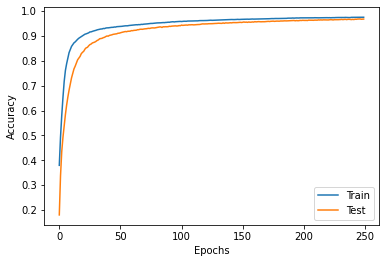

In [4]:
plt.plot(epoch.history['val_accuracy'])
plt.plot(epoch.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])


In [7]:
import pandas as pd
Accuracies = pd.DataFrame()
Accuracies['Validation'] = epoch.history['val_accuracy']
Accuracies['Training'] = epoch.history['accuracy']
writer = pd.ExcelWriter('Accuracies.xlsx')
Accuracies.to_excel(writer)
from google.colab import files
files.download('Accuracies.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>